In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import shapiro

In [17]:
import os
os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp')

In [18]:
#reading data
veri=pd.read_csv('hmelq.csv')
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [122]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3576 non-null category
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: category(1), float64(9), int64(2), object(1)
memory usage: 339.0+ KB


In [123]:
#nan değerleri temizledim
veri=veri.dropna()
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,n,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,n,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,n,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,n,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,n,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [188]:
#jobların yalnızca baş harflerini aldık
print(type(veri["job"]))
char_job=veri["job"].astype(str)
new_job=np.array([job[0] for job in char_job])
veri["job"]=pd.Categorical(new_job)
veri.head()

<class 'pandas.core.series.Series'>


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,n,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,n,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,n,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,n,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,n,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [190]:
# badlerin dağılımlarının sayısı
tb1=pd.crosstab(index=veri["bad"],columns="Count")
#tb.index=["0=False","1=True"]
tb1

col_0,Count
bad,
0,1888
1,178


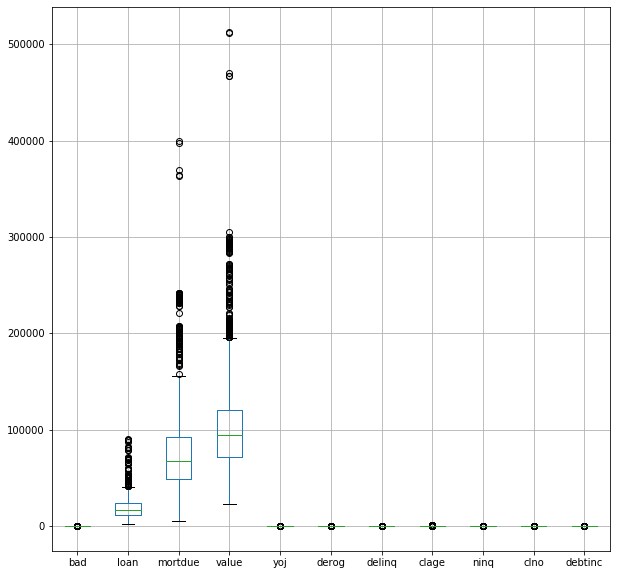

In [191]:
#tüm verinin boxplotu
veri.boxplot(figsize=(10,10))

In [127]:
#job'ların sayıları
tb2=pd.crosstab(index=veri["job"],columns="Count")
tb2

col_0,Count
job,
M,269
O,1122
P,539
S,88
n,48


In [128]:
#jobların 0 ve 1 e göre dağılımları
tb_bad_job=pd.crosstab(index=veri["job"],columns=veri["bad"],margins=True)
tb_bad_job

bad,0,1,All
job,,,
M,242,27,269
O,1020,102,1122
P,504,35,539
S,74,14,88
n,48,0,48
All,1888,178,2066


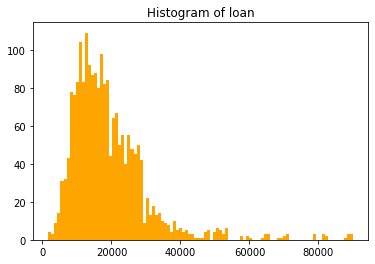

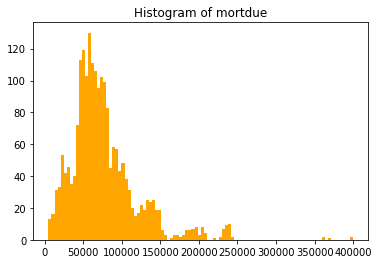

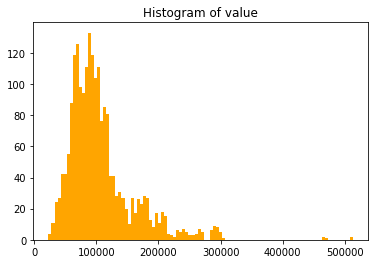

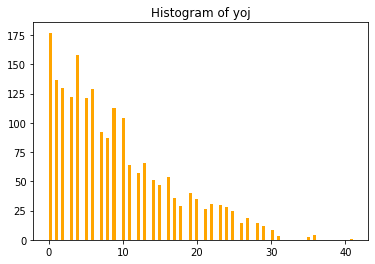

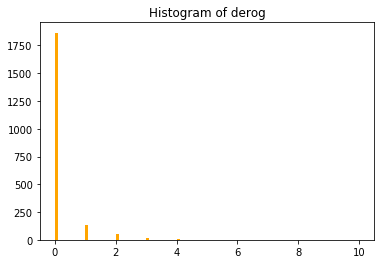

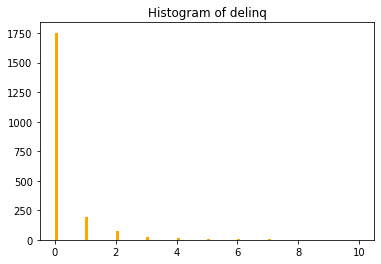

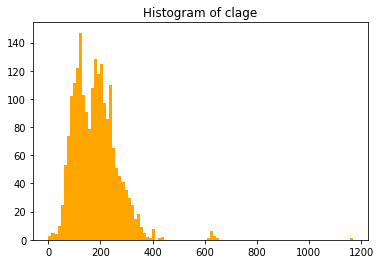

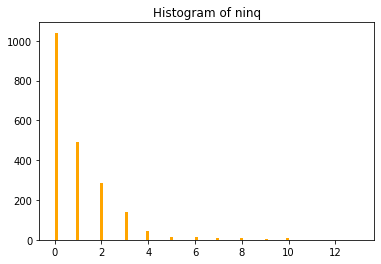

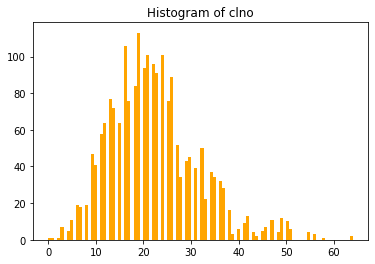

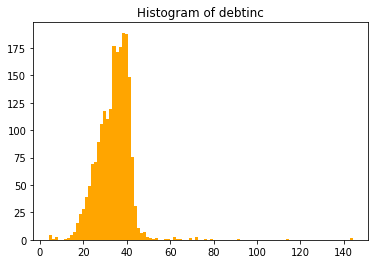

In [200]:
#tüm nümeriklerin histogram grafikleri
for i in veri.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        plt.figure()
        plt.hist(veri[i],bins=100,color="orange")
        plt.title("Histogram of " + i)

In [203]:
##tüm nümerik değerlerde bad'in 0 ve 1 olduğu durumlar için shapiro testi
grps=pd.unique(veri.bad.values)
grps
alpha=0.05
for i in veri.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        for name in grps:
            stat,p=shapiro(veri[i][veri['bad']==name])
            print(i)
            print(name,"için İstatistik değeri: %.3f, p değeri =" %stat , p)        
            if p >alpha:
                print('Orneklem Normal (Gaussian) dağılımdan gelmektedir')  
            else:
                print('Orneklem Normal (Gaussian) dağılım gostermemektedir')
      

loan
0 için İstatistik değeri: 0.795, p değeri = 1.1630777253895982e-43
Orneklem Normal (Gaussian) dağılım gostermemektedir
loan
1 için İstatistik değeri: 0.904, p değeri = 2.437214208228511e-09
Orneklem Normal (Gaussian) dağılım gostermemektedir
mortdue
0 için İstatistik değeri: 0.877, p değeri = 3.021667993607674e-36
Orneklem Normal (Gaussian) dağılım gostermemektedir
mortdue
1 için İstatistik değeri: 0.753, p değeri = 5.364428532155343e-16
Orneklem Normal (Gaussian) dağılım gostermemektedir
value
0 için İstatistik değeri: 0.855, p değeri = 1.6058583325887967e-38
Orneklem Normal (Gaussian) dağılım gostermemektedir
value
1 için İstatistik değeri: 0.735, p değeri = 1.3988843091622356e-16
Orneklem Normal (Gaussian) dağılım gostermemektedir
yoj
0 için İstatistik değeri: 0.913, p değeri = 1.4004001568224597e-31
Orneklem Normal (Gaussian) dağılım gostermemektedir
yoj
1 için İstatistik değeri: 0.877, p değeri = 6.26317955831901e-11
Orneklem Normal (Gaussian) dağılım gostermemektedir
derog
0

In [221]:
###nümerik değişkenlerimin hepsi normal dağılım göstermediği için levene yaptım, constant variance var mı yok mu baktım
## constant varyansın olup olmamasına göre ise equal_var değerini her bir bileşen için döngüden aldım
## ardından oneway yaptım

from scipy.stats import levene
from scipy import stats
from scipy.stats import f_oneway
for i in veri.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        stat,p = levene(veri[i][veri['bad'] == 0],
               veri[i][veri['bad'] == 1]) 
        print("\n",i,"için istatistik değeri: %.3f ve p değeri =" %stat , p)#equal variance test
        alpha=0.05
        if p >alpha:
            print('Orneklem Sabit varyansa(constant variance) sahiptir)')
            const=True
        else:
            print('Orneklem Sabit varyansa(constant variance) sahip değildir')
            const=False
        ##aynı döngü içinde ttest yaptım, constant varyansı levene ile aldım(const)
        s,p =f_oneway(veri[i][veri['bad'] == 0],
               veri[i][veri['bad'] == 1])
        print("F_oneway istatistik değeri: %.3f ve p değeri =" %s , p)
        if p < 0.05:
            print("Bu veri etkili bir değişkendir (H0 = reject)")
        else:
            print("Bu veri etkili bir değişken değildir (H0 = fail to reject)")

            


 loan için istatistik değeri: 1.370 ve p değeri = 0.2420150484778208
Orneklem Sabit varyansa(constant variance) sahiptir)
F_oneway istatistik değeri: 1.626 ve p değeri = 0.2023831125068158
Bu veri etkili bir değişken değildir (H0 = fail to reject)

 mortdue için istatistik değeri: 2.447 ve p değeri = 0.11791499032417165
Orneklem Sabit varyansa(constant variance) sahiptir)
F_oneway istatistik değeri: 1.021 ve p değeri = 0.31249048336490165
Bu veri etkili bir değişken değildir (H0 = fail to reject)

 value için istatistik değeri: 4.486 ve p değeri = 0.03429973055769503
Orneklem Sabit varyansa(constant variance) sahip değildir
F_oneway istatistik değeri: 1.728 ve p değeri = 0.1887578287013056
Bu veri etkili bir değişken değildir (H0 = fail to reject)

 yoj için istatistik değeri: 4.631 ve p değeri = 0.03151091334250296
Orneklem Sabit varyansa(constant variance) sahip değildir
F_oneway istatistik değeri: 5.640 ve p değeri = 0.01764276145158827
Bu veri etkili bir değişkendir (H0 = reject)
